In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/UBC-OCEAN/updated_image_ids.json
/kaggle/input/UBC-OCEAN/sample_submission.csv
/kaggle/input/UBC-OCEAN/train.csv
/kaggle/input/UBC-OCEAN/test.csv
/kaggle/input/UBC-OCEAN/test_thumbnails/41_thumbnail.png
/kaggle/input/UBC-OCEAN/train_images/14127.png
/kaggle/input/UBC-OCEAN/train_images/34649.png
/kaggle/input/UBC-OCEAN/train_images/15221.png
/kaggle/input/UBC-OCEAN/train_images/52375.png
/kaggle/input/UBC-OCEAN/train_images/17487.png
/kaggle/input/UBC-OCEAN/train_images/32112.png
/kaggle/input/UBC-OCEAN/train_images/22290.png
/kaggle/input/UBC-OCEAN/train_images/48734.png
/kaggle/input/UBC-OCEAN/train_images/39146.png
/kaggle/input/UBC-OCEAN/train_images/64950.png
/kaggle/input/UBC-OCEAN/train_images/32042.png
/kaggle/input/UBC-OCEAN/train_images/63429.png
/kaggle/input/UBC-OCEAN/train_images/13526.png
/kaggle/input/UBC-OCEAN/train_images/53859.png
/kaggle/input/UBC-OCEAN/train_images/63836.png
/kaggle/input/UBC-OCEAN/train_images/56117.png
/kaggle/input/UBC-OCEAN/train_i

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from matplotlib.image import imread
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , auc
from sklearn.model_selection import train_test_split

In [3]:
train_df = pd.DataFrame(pd.read_csv("/kaggle/input/UBC-OCEAN/train.csv"))
print(train_df)
test_df = pd.DataFrame(pd.read_csv("/kaggle/input/UBC-OCEAN/test.csv"))
print(test_df)

     image_id label  image_width  image_height  is_tma
0           4  HGSC        23785         20008   False
1          66  LGSC        48871         48195   False
2          91  HGSC         3388          3388    True
3         281  LGSC        42309         15545   False
4         286    EC        37204         30020   False
..        ...   ...          ...           ...     ...
533     65022  LGSC        53355         46675   False
534     65094    MC        55042         45080   False
535     65300  HGSC        75860         27503   False
536     65371  HGSC        42551         41800   False
537     65533  HGSC        45190         33980   False

[538 rows x 5 columns]
   image_id  image_width  image_height
0        41        28469         16987


In [4]:
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_id      538 non-null    int64 
 1   label         538 non-null    object
 2   image_width   538 non-null    int64 
 3   image_height  538 non-null    int64 
 4   is_tma        538 non-null    bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 17.5+ KB
None
           image_id    image_width  image_height
count    538.000000     538.000000    538.000000
mean   32194.340149   48859.533457  29729.460967
std    18774.950592   20040.989927  10762.899796
min        4.000000    2964.000000   2964.000000
25%    15881.250000   34509.000000  22089.500000
50%    32152.000000   48160.000000  29732.000000
75%    47892.500000   64143.750000  37880.750000
max    65533.000000  105763.000000  50155.000000


In [5]:
train_df['label'].value_counts()

label
HGSC    222
EC      124
CC       99
LGSC     47
MC       46
Name: count, dtype: int64

In [6]:
train_df['is_tma'].value_counts()

is_tma
False    513
True      25
Name: count, dtype: int64

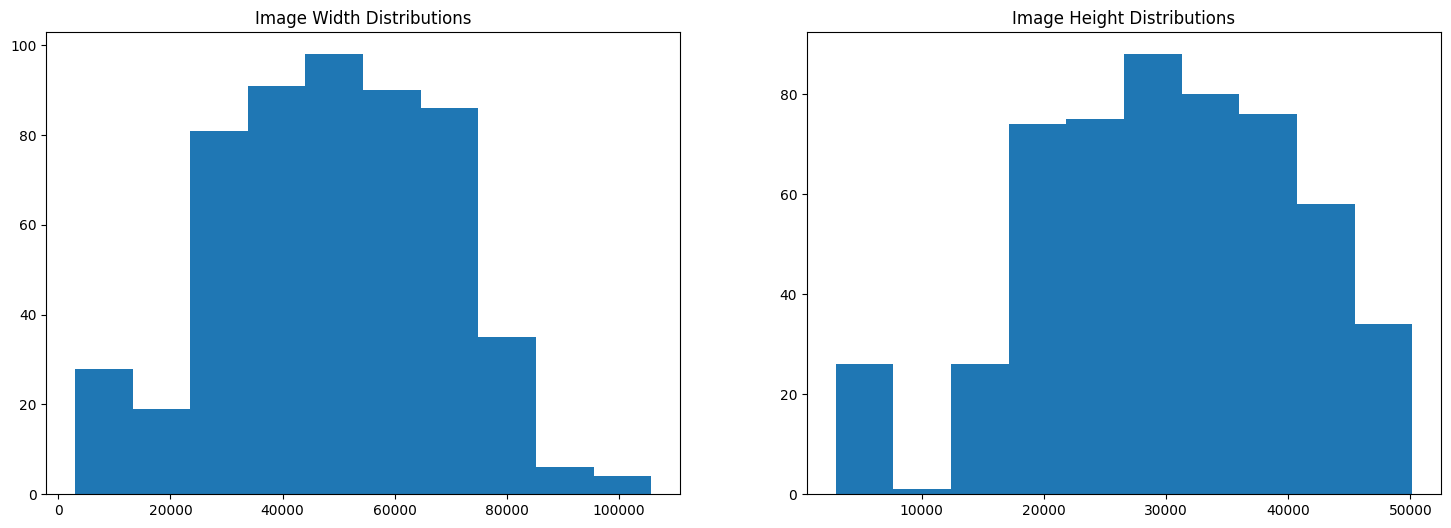

In [7]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.hist(x=train_df['image_width'])
plt.title("Image Width Distributions")
plt.subplot(1,2,2)
plt.hist(x=train_df['image_height'])
plt.title("Image Height Distributions")
plt.show()

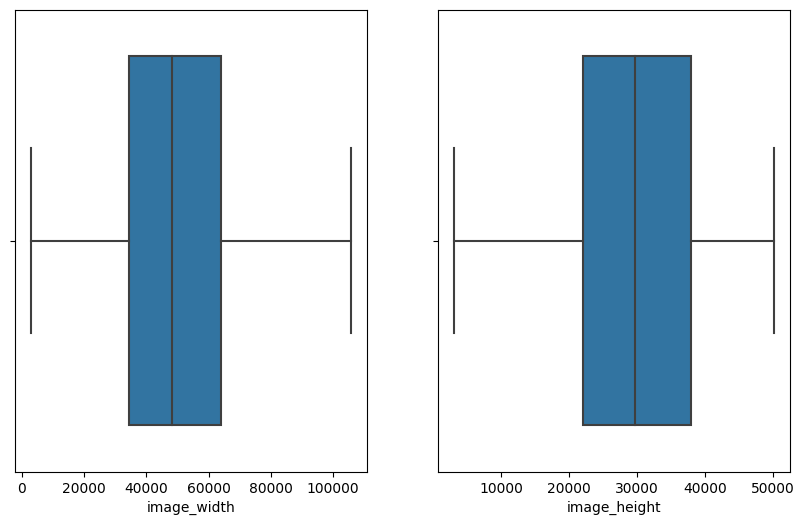

In [8]:
plt.figure(figsize=(10,6)) 
plt.subplot(1,2,1)
sns.boxplot(data=train_df,x="image_width")
plt.subplot(1,2,2)
sns.boxplot(data=train_df,x="image_height")
plt.show()

In [9]:
path_train_thumb = "/kaggle/input/UBC-OCEAN/train_thumbnails"
path_test_thumb = "/kaggle/input/UBC-OCEAN/test_thumbnails"
train_folder_thumb = os.listdir(path_train_thumb)
test_folder_thumb = os.listdir(path_test_thumb)

print(len(train_folder_thumb))
print(len(test_folder_thumb))

513
1


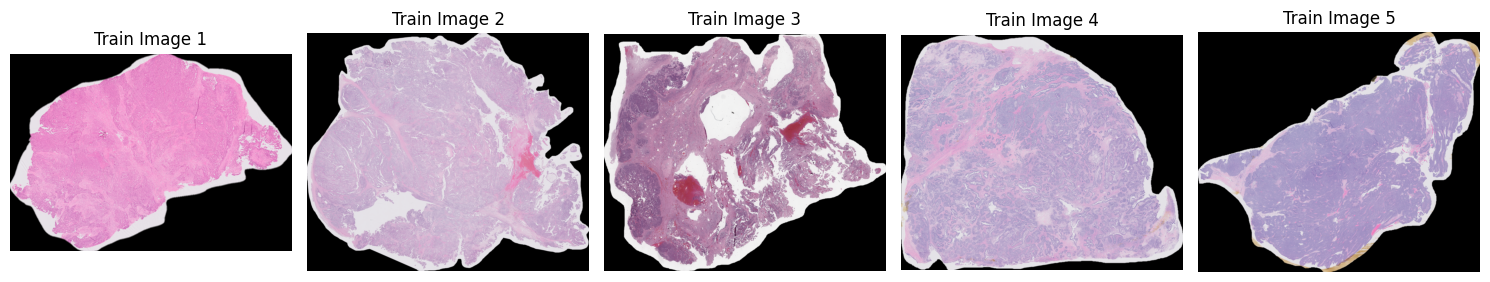

In [10]:
train_data = glob.glob('/kaggle/input/UBC-OCEAN/train_thumbnails/*.png')
test_data = glob.glob('/kaggle/input/UBC-OCEAN/test_thumbnails/*.png')

# Display a few sample images from the training set
num_samples = 5

fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i, image_path in enumerate(train_data[:num_samples]):
    img = imread(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f'Train Image {i+1}')

plt.tight_layout()
plt.savefig('Train Iamge.png')
plt.show()

In [11]:
path_train_images = "/kaggle/input/UBC-OCEAN/train_images"
path_test_images = "/kaggle/input/UBC-OCEAN/test_images"
train_folder_images = os.listdir(path_train_images)
test_folder_images = os.listdir(path_test_images)

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_df['encoded_classes'] = label_encoder.fit_transform(train_df['label'])


In [13]:
train_df_1 = train_df.drop("label" , axis =1)

In [14]:
train_df_1['is_tma'] = label_encoder.fit_transform(train_df['is_tma'])

In [15]:
train_df_1

,image_id,image_width,image_height,is_tma,encoded_classes
0,4,23785,20008,0,2
1,66,48871,48195,0,3
2,91,3388,3388,1,2
3,281,42309,15545,0,3
4,286,37204,30020,0,1
...,...,...,...,...,...
533,65022,53355,46675,0,3
534,65094,55042,45080,0,4
535,65300,75860,27503,0,2
536,65371,42551,41800,0,2
